# 캡스톤디자인1 졸업작품
### 데이터사이언스학부 
### 201884045 배상원

## 1. 데이터 전처리

In [1]:
#데이터 불러오기 및 column이름 붙이기
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
rating_file_path = 'C:/Users/USER/Desktop/ml-1m/ratings.dat'
movie_file_path = 'C:/Users/USER/Desktop/ml-1m/movies.dat'
user_file_path = 'C:/Users/USER/Desktop/ml-1m/users.dat'

rating_data = pd.io.parsers.read_csv(rating_file_path,
                                    names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::', encoding='ISO-8859-1')
movie_data = pd.io.parsers.read_csv(movie_file_path, 
                                    names=['movie_id', 'title', 'genre'], delimiter='::', encoding='ISO-8859-1')
user_data = pd.io.parsers.read_csv(user_file_path, 
                                   names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], delimiter='::', encoding='ISO-8859-1')

In [2]:
#필요없는 zipcode와 timestamp를 제거
user_data.drop('zipcode', axis = 1, inplace = True)
rating_data.drop('time', axis = 1, inplace = True)

In [3]:
#ratings, movies, users 데이터 합치기
df_ratings_movie = pd.merge(rating_data, movie_data, on='movie_id')
df_ratings_movie = df_ratings_movie.sort_values(by=['user_id'])
df = pd.merge(df_ratings_movie, user_data, on='user_id')

In [4]:
#데이터 결측값 및 type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   title       1000209 non-null  object
 4   genre       1000209 non-null  object
 5   gender      1000209 non-null  object
 6   age         1000209 non-null  int64 
 7   occupation  1000209 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 68.7+ MB


In [5]:
#데이터 확인
df

,user_id,movie_id,rating,title,genre,gender,age,occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,1,48,5,Pocahontas (1995),Animation|Children's|Musical|Romance,F,1,10
2,1,938,4,Gigi (1958),Musical,F,1,10
3,1,1207,4,To Kill a Mockingbird (1962),Drama,F,1,10
4,1,1721,4,Titanic (1997),Drama|Romance,F,1,10
...,...,...,...,...,...,...,...,...
1000204,6040,2641,2,Superman II (1980),Action|Adventure|Sci-Fi,M,25,6
1000205,6040,1947,4,West Side Story (1961),Musical|Romance,M,25,6
1000206,6040,904,4,Rear Window (1954),Mystery|Thriller,M,25,6
1000207,6040,2664,4,Invasion of the Body Snatchers (1956),Horror|Sci-Fi,M,25,6


In [6]:
#genre 전처리
df['genre'] = df.genre.str.replace('Action', '01')
df['genre'] = df.genre.str.replace('Adventure', '02')
df['genre'] = df.genre.str.replace('Animation', '03')
df['genre'] = df.genre.str.replace('Children\'s', '04')
df['genre'] = df.genre.str.replace('Comedy', '05')
df['genre'] = df.genre.str.replace('Crime', '06')
df['genre'] = df.genre.str.replace('Documentary', '07')
df['genre'] = df.genre.str.replace('Drama', '08')
df['genre'] = df.genre.str.replace('Fantasy', '09')
df['genre'] = df.genre.str.replace('Film-Noir', '10')
df['genre'] = df.genre.str.replace('Horror', '11')
df['genre'] = df.genre.str.replace('Musical', '12')
df['genre'] = df.genre.str.replace('Mystery', '13')
df['genre'] = df.genre.str.replace('Romance', '14')
df['genre'] = df.genre.str.replace('Sci-Fi', '15')
df['genre'] = df.genre.str.replace('Thriller', '16')
df['genre'] = df.genre.str.replace('War', '17')
df['genre'] = df.genre.str.replace('Western', '18')

In [7]:
#gender 전처리
df['gender'] = df.gender.str.replace('F', '1')
df['gender'] = df.gender.str.replace('M', '2')
df['gender'] = df.gender.astype(int)

In [8]:
df

,user_id,movie_id,rating,title,genre,gender,age,occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),08,1,1,10
1,1,48,5,Pocahontas (1995),03|04|12|14,1,1,10
2,1,938,4,Gigi (1958),12,1,1,10
3,1,1207,4,To Kill a Mockingbird (1962),08,1,1,10
4,1,1721,4,Titanic (1997),08|14,1,1,10
...,...,...,...,...,...,...,...,...
1000204,6040,2641,2,Superman II (1980),01|02|15,2,25,6
1000205,6040,1947,4,West Side Story (1961),12|14,2,25,6
1000206,6040,904,4,Rear Window (1954),13|16,2,25,6
1000207,6040,2664,4,Invasion of the Body Snatchers (1956),11|15,2,25,6


In [9]:
# genre 앞의 2자리 남기고 뒷부분 제거
df['genre'] = df.genre.str.slice(0,2).astype(int)

In [10]:
df

,user_id,movie_id,rating,title,genre,gender,age,occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),8,1,1,10
1,1,48,5,Pocahontas (1995),3,1,1,10
2,1,938,4,Gigi (1958),12,1,1,10
3,1,1207,4,To Kill a Mockingbird (1962),8,1,1,10
4,1,1721,4,Titanic (1997),8,1,1,10
...,...,...,...,...,...,...,...,...
1000204,6040,2641,2,Superman II (1980),1,2,25,6
1000205,6040,1947,4,West Side Story (1961),12,2,25,6
1000206,6040,904,4,Rear Window (1954),13,2,25,6
1000207,6040,2664,4,Invasion of the Body Snatchers (1956),11,2,25,6


In [11]:
# 바뀐내용 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     1000209 non-null  int64 
 1   movie_id    1000209 non-null  int64 
 2   rating      1000209 non-null  int64 
 3   title       1000209 non-null  object
 4   genre       1000209 non-null  int32 
 5   gender      1000209 non-null  int32 
 6   age         1000209 non-null  int64 
 7   occupation  1000209 non-null  int64 
dtypes: int32(2), int64(5), object(1)
memory usage: 61.0+ MB


In [12]:
df['genre'].value_counts().sort_index()#18개의 장르

1     257457
2      43630
3      36936
4      21491
5     276923
6      37849
7       6817
8     208627
9        790
10      9343
11     44170
12      7112
13     10237
14      2832
15     11464
16     17851
17       991
18      5689
Name: genre, dtype: int64

In [13]:
df['occupation'].value_counts().sort_index()#21개의 직업

0     130499
1      85351
2      50068
3      31623
4     131032
5      21850
6      37205
7     105425
8       2706
9      11345
10     23290
11     20563
12     57214
13     13754
14     49109
15     22951
16     46021
17     72816
18     12086
19     14904
20     60397
Name: occupation, dtype: int64

In [14]:
df['age'].value_counts().sort_index()#7개의 나이범주

1      27211
18    183536
25    395556
35    199003
45     83633
50     72490
56     38780
Name: age, dtype: int64

In [15]:
#age는 원래대로 하는 것과 전처리해주는 것과 결과적으로 정규화를 거치면 차이가 없다.
#df['age'] = df.age.replace(1, '1')
#df['age'] = df.age.replace(18, '2')
#df['age'] = df.age.replace(25, '3')
#df['age'] = df.age.replace(35, '4')
#df['age'] = df.age.replace(45, '5')
#df['age'] = df.age.replace(50, '6')
#df['age'] = df.age.replace(56, '7')
#df['age'] = df.age.astype(int)

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [41]:
x = df.drop(['user_id', 'movie_id', 'title'], axis=1).values#독립변인들의 value값만 추출
y = df['user_id'].values # 종속변인 추출

x = StandardScaler().fit_transform(x)

features = ['rating', 'genre', 'gender', 'age', 'occupation']
df_scaled=pd.DataFrame(x, columns=features)
df_scaled

,rating,genre,gender,age,occupation
0,1.269747,0.723809,-1.748894,-2.445403,0.300683
1,1.269747,-0.611699,-1.748894,-2.445403,0.300683
2,0.374573,1.792215,-1.748894,-2.445403,0.300683
3,0.374573,0.723809,-1.748894,-2.445403,0.300683
4,0.374573,0.723809,-1.748894,-2.445403,0.300683
...,...,...,...,...,...
1000204,-1.415775,-1.145902,0.571790,-0.403193,-0.311749
1000205,0.374573,1.792215,0.571790,-0.403193,-0.311749
1000206,0.374573,2.059316,0.571790,-0.403193,-0.311749
1000207,0.374573,1.525113,0.571790,-0.403193,-0.311749


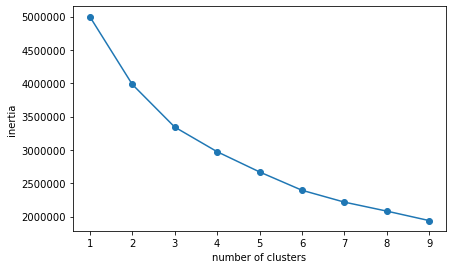

In [19]:
inertia = []
for i in range(1, 10):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(df_scaled)
    inertia.append(km.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.tight_layout()
plt.ticklabel_format(style='plain')
plt.show()

# pca + k-means

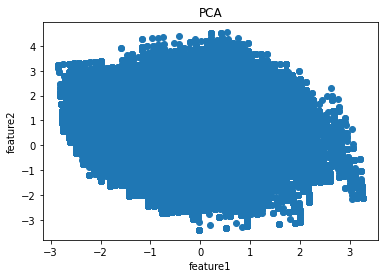

In [21]:
from sklearn import decomposition
import matplotlib.pyplot as plt


#compute PCA
pca = decomposition.PCA(n_components = 2)
pca.fit(df_scaled)
X_trans = pca.transform(df_scaled)
plt.scatter(X_trans[:, 0], X_trans[:, 1])
plt.title("PCA")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

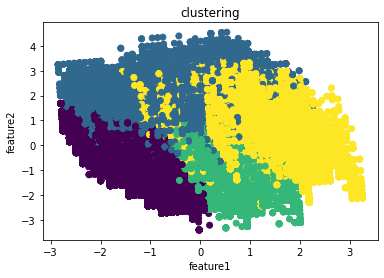

In [22]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(df_scaled)
y_kmeans = kmeans.predict(df_scaled)
plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y_kmeans)
plt.title("clustering")
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.show()

In [24]:
clust_model = KMeans(n_clusters = 4)
clust_model.fit(df_scaled)
centers = clust_model.cluster_centers_
pred = clust_model.predict(df_scaled)

In [26]:
clust_df = df_scaled.copy()
clust_df['cluster'] = pred
clust_df

,rating,gender,age,occupation,genre,cluster
0,1.269747,0.723809,-1.748894,-2.445403,0.300683,2
1,1.269747,-0.611699,-1.748894,-2.445403,0.300683,2
2,0.374573,1.792215,-1.748894,-2.445403,0.300683,2
3,0.374573,0.723809,-1.748894,-2.445403,0.300683,2
4,0.374573,0.723809,-1.748894,-2.445403,0.300683,2
...,...,...,...,...,...,...
1000204,-1.415775,-1.145902,0.571790,-0.403193,-0.311749,0
1000205,0.374573,1.792215,0.571790,-0.403193,-0.311749,3
1000206,0.374573,2.059316,0.571790,-0.403193,-0.311749,3
1000207,0.374573,1.525113,0.571790,-0.403193,-0.311749,3


In [27]:
clust_df.sort_values(by=['cluster'], axis=0)

,rating,gender,age,occupation,genre,cluster
1000208,-1.415775,0.723809,0.57179,-0.403193,-0.311749,0
826410,-0.520601,-0.077496,0.57179,-0.403193,-0.311749,0
826412,-0.520601,0.723809,0.57179,-0.403193,-0.311749,0
826414,-0.520601,-0.077496,0.57179,-0.403193,-0.311749,0
826416,0.374573,-0.077496,0.57179,-0.403193,-0.311749,0
...,...,...,...,...,...,...
292387,-0.520601,0.723809,0.57179,0.447728,-0.158641,3
292386,1.269747,0.723809,0.57179,0.447728,-0.158641,3
292382,1.269747,0.723809,0.57179,0.447728,-0.158641,3
292378,1.269747,0.723809,0.57179,0.447728,-0.158641,3


In [28]:
clus0 = clust_df['cluster'] == 0
cluster0 = clust_df[clus0]
cluster0.head()

,rating,gender,age,occupation,genre,cluster
242,-2.310949,-1.145902,0.57179,1.298648,-0.158641,0
523,1.269747,-1.145902,0.57179,0.447728,-1.077290,0
524,1.269747,-1.145902,0.57179,0.447728,-1.077290,0
525,-0.520601,-1.145902,0.57179,0.447728,-1.077290,0
526,0.374573,-1.145902,0.57179,0.447728,-1.077290,0


In [29]:
clus1 = clust_df['cluster'] == 1
cluster1 = clust_df[clus1]
cluster1.head()

,rating,gender,age,occupation,genre,cluster
53,-0.520601,-0.077496,0.57179,2.234661,1.219332,1
54,-0.520601,-1.145902,0.57179,2.234661,1.219332,1
58,-0.520601,-1.145902,0.57179,2.234661,1.219332,1
59,-0.520601,-1.145902,0.57179,2.234661,1.219332,1
62,-0.520601,-0.077496,0.57179,2.234661,1.219332,1


In [30]:
clus2 = clust_df['cluster'] == 2
cluster2 = clust_df[clus2]
cluster2.head()

,rating,gender,age,occupation,genre,cluster
0,1.269747,0.723809,-1.748894,-2.445403,0.300683,2
1,1.269747,-0.611699,-1.748894,-2.445403,0.300683,2
2,0.374573,1.792215,-1.748894,-2.445403,0.300683,2
3,0.374573,0.723809,-1.748894,-2.445403,0.300683,2
4,0.374573,0.723809,-1.748894,-2.445403,0.300683,2


In [31]:
clus3 = clust_df['cluster'] == 3
cluster3 = clust_df[clus3]
cluster3.head()

,rating,gender,age,occupation,genre,cluster
55,-0.520601,0.723809,0.57179,2.234661,1.219332,3
56,1.269747,0.723809,0.57179,2.234661,1.219332,3
57,0.374573,0.723809,0.57179,2.234661,1.219332,3
60,0.374573,0.723809,0.57179,2.234661,1.219332,3
61,-0.520601,0.723809,0.57179,2.234661,1.219332,3


In [32]:
cluster0['age'].value_counts().sort_index()

0.57179    326447
Name: age, dtype: int64

In [33]:
cluster1['age'].value_counts().sort_index()

0.57179    268013
Name: age, dtype: int64

In [34]:
cluster2['age'].value_counts().sort_index()

-1.748894    242364
Name: age, dtype: int64

In [35]:
cluster3['age'].value_counts().sort_index()

-1.748894      4076
 0.571790    159309
Name: age, dtype: int64

In [37]:
cluster0['genre'].value_counts().sort_index()

-1.230398    75455
-1.077290    35100
-0.924182    26066
-0.771074    11837
-0.617966    86705
-0.464857    13758
-0.311749    12218
-0.158641    47993
-0.005533      631
 0.147575      149
 0.300683    14933
 0.453791     1015
 0.606899      435
 0.760007       21
 0.913116      131
Name: genre, dtype: int64

In [38]:
cluster1['genre'].value_counts().sort_index()

-0.464857       21
-0.311749     1278
-0.158641     8064
-0.005533      571
 0.147575      341
 0.300683      328
 0.453791    11719
 0.606899    39585
 0.760007     6431
 0.913116    31294
 1.066224    16373
 1.219332    32029
 1.372440    57508
 1.525548    10221
 1.678656    10802
 1.831764    41448
Name: genre, dtype: int64

In [39]:
cluster2['genre'].value_counts().sort_index()

-1.230398    32463
-1.077290    31964
-0.924182    15771
-0.771074    14013
-0.617966    32318
-0.464857     3825
-0.311749    14579
-0.158641    17638
-0.005533      604
 0.147575    10342
 0.300683     6983
 0.453791     2606
 0.606899     6623
 0.760007     2660
 0.913116    11858
 1.066224     4141
 1.219332     7194
 1.372440     7506
 1.525548      398
 1.678656     3420
 1.831764    15458
Name: genre, dtype: int64

In [40]:
cluster3['genre'].value_counts().sort_index()

-1.230398    22581
-1.077290    18287
-0.924182     8231
-0.771074     5773
-0.617966    12009
-0.464857     4246
-0.311749     9130
-0.158641    31730
-0.005533      900
 0.147575      513
 0.300683     1046
 0.453791     5223
 0.606899    10571
 0.760007     4642
 0.913116     5826
 1.066224     2437
 1.219332     6798
 1.372440     7802
 1.525548     1467
 1.678656      682
 1.831764     3491
Name: genre, dtype: int64